<a href="https://colab.research.google.com/github/harishkodidela/Data-Science-Project/blob/main/Precipitation_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###Importing Weather Data

In [2]:
#Taking dataset from github as data uploaded into github.
cd = pd.read_csv("https://raw.githubusercontent.com/harishkodidela/Data-Science-Project/main/bengaluru1972_2022.csv")
cd

,DateTime,rain,temp_min,temp_max
0,1972-01-01,0.0000,16.1600,27.9200
1,1972-01-02,0.0000,15.0800,27.7900
2,1972-01-03,0.0000,13.6800,28.7300
3,1972-01-04,0.0000,14.1500,28.9200
4,1972-01-05,0.0000,13.6800,28.4400
...,...,...,...,...
18623,2022-12-27,1.3664,20.2516,27.6140
18624,2022-12-28,0.2756,19.9058,29.5648
18625,2022-12-29,0.0000,18.8444,29.6711
18626,2022-12-30,0.0000,17.6626,29.0639


###Exploratory Data Analysis

In [3]:
cd.isnull().sum()

DateTime    0
rain        0
temp_min    0
temp_max    0
dtype: int64

In [4]:
cd.head()

,DateTime,rain,temp_min,temp_max
0,1972-01-01,0.0,16.16,27.92
1,1972-01-02,0.0,15.08,27.79
2,1972-01-03,0.0,13.68,28.73
3,1972-01-04,0.0,14.15,28.92
4,1972-01-05,0.0,13.68,28.44


Variables Relationship

In [5]:
#checking non-numeric columns
non_numeric_columns = cd.select_dtypes(exclude=['number']).columns
#converting a column to datetime
cd['DateTime'] = pd.to_datetime(cd['DateTime'])
#correlation of variables
cd.corr()



,DateTime,rain,temp_min,temp_max
DateTime,1.000000,0.037550,0.120726,0.050205
rain,0.037550,1.000000,0.117608,-0.062862
temp_min,0.120726,0.117608,1.000000,0.530940
temp_max,0.050205,-0.062862,0.530940,1.000000


###Correlation HeatMap

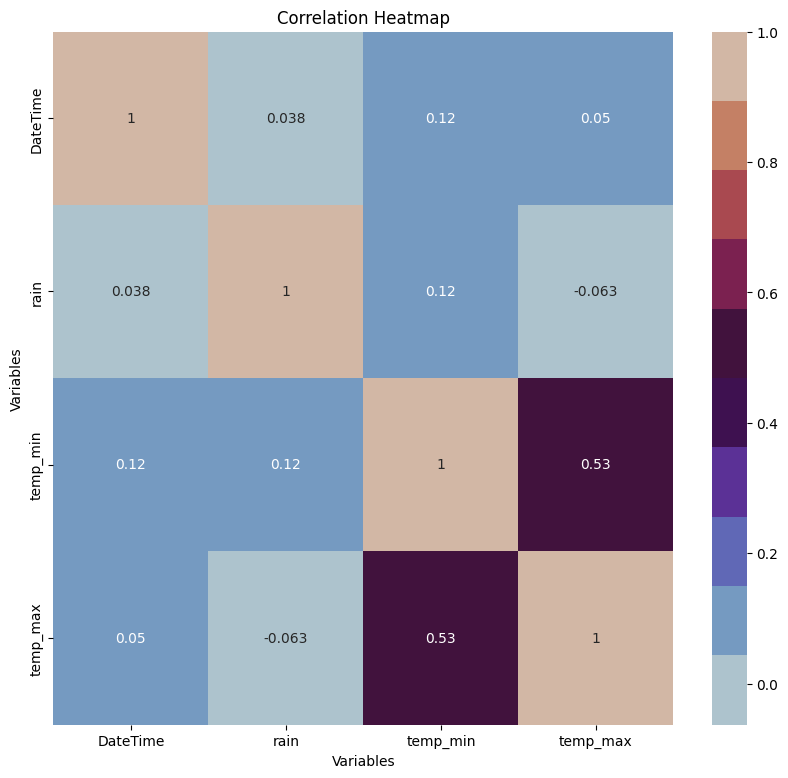

In [6]:
plt.figure(figsize=(10, 9))
cmap = sns.color_palette("twilight", 10)
sns.heatmap(cd.corr(), annot=True, cmap=cmap)
plt.title('Correlation Heatmap')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

### Maximum and Minimum Temperature for a Day

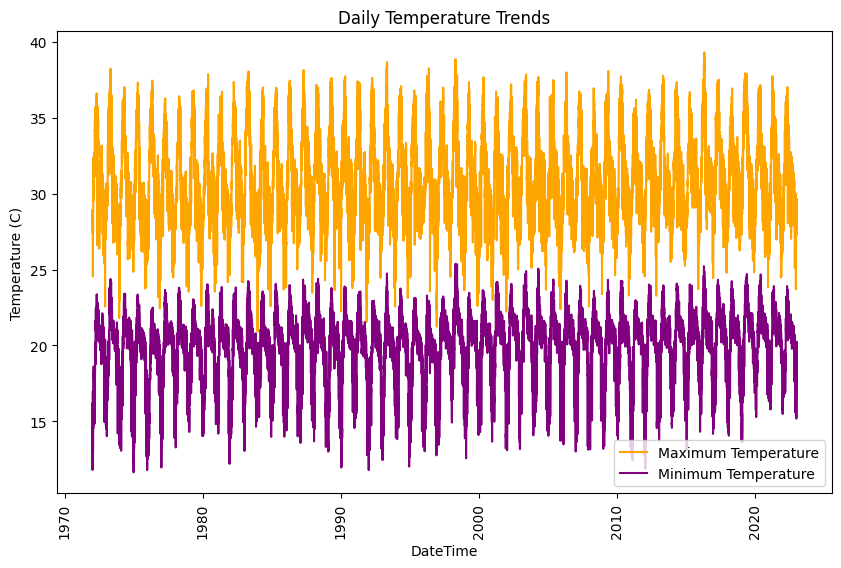

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(cd['DateTime'], cd['temp_max'], color='orange', label='Maximum Temperature')

plt.plot(cd['DateTime'], cd['temp_min'], color='purple', label='Minimum Temperature')

plt.xlabel('DateTime')
plt.ylabel('Temperature (C)')
plt.title("Daily Temperature Trends")
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [8]:
cd_filtered =cd[cd['rain']>0]

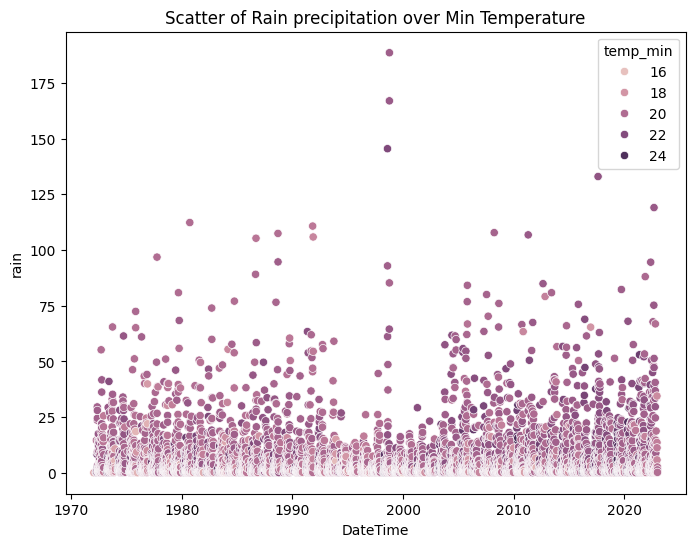

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=cd_filtered['DateTime'], y=cd_filtered['rain'],hue=cd_filtered['temp_min'])
plt.title('Scatter of Rain precipitation over Min Temperature')
plt.show()

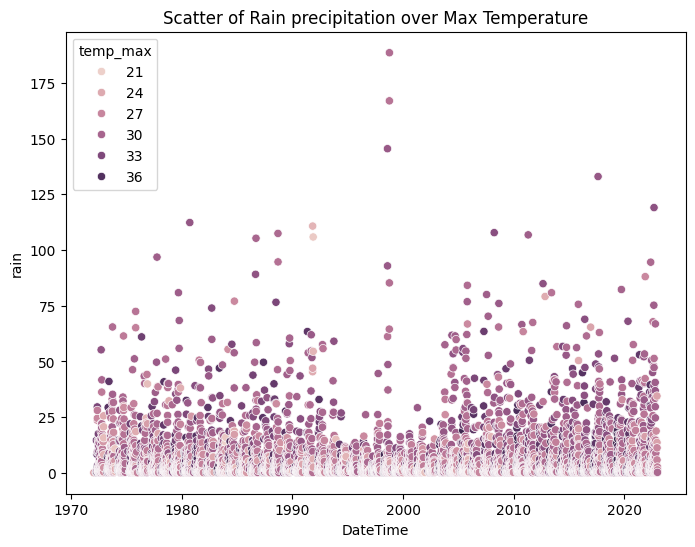

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=cd_filtered['DateTime'], y=cd_filtered['rain'],hue=cd_filtered['temp_max'])
plt.title('Scatter of Rain precipitation over Max Temperature')
plt.show()

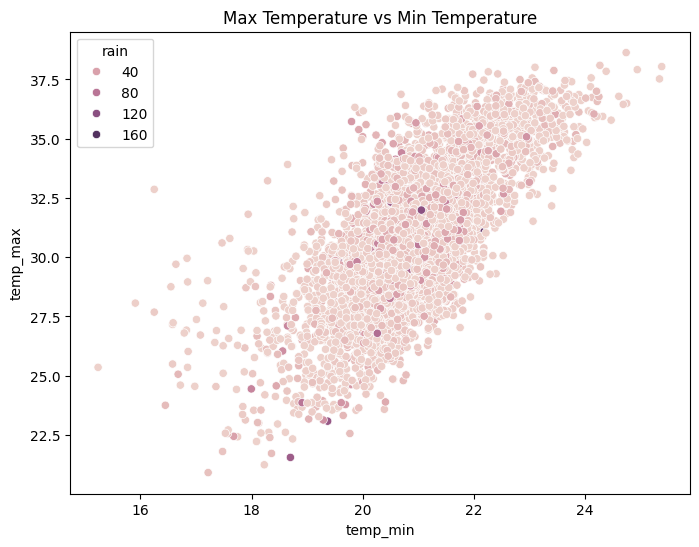

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = cd_filtered, x = 'temp_min', y = 'temp_max', hue = 'rain')
plt.title("Max Temperature vs Min Temperature")
plt.show()

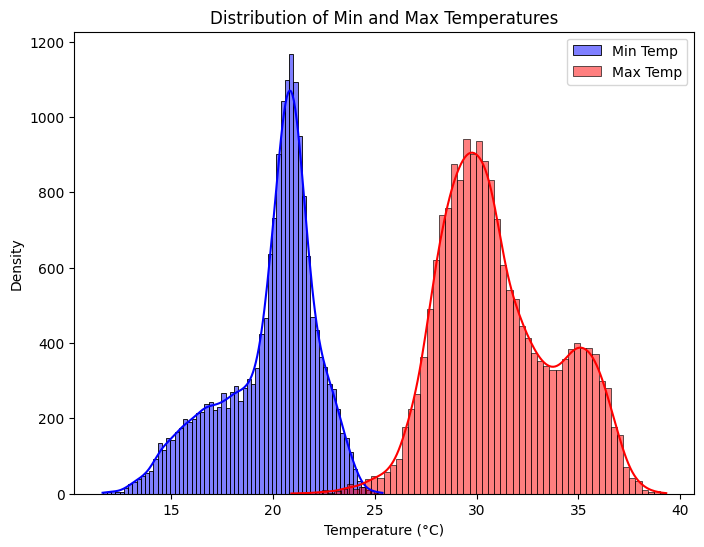

In [12]:
plt.figure(figsize=(8,6))
sns.histplot(cd['temp_min'], kde=True, color='blue', label='Min Temp')
sns.histplot(cd['temp_max'], kde=True, color='red', label='Max Temp')
plt.title("Distribution of Min and Max Temperatures")
plt.xlabel("Temperature (°C)")
plt.ylabel("Density")
plt.legend()
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Pre-Processing

In [14]:
cd['year'] = cd['DateTime'].dt.year
cd['month'] = cd['DateTime'].dt.month
cd['day'] = cd['DateTime'].dt.day
cd['hour'] = cd['DateTime'].dt.hour
cd = cd.drop('DateTime', axis = 1)

In [15]:
X = cd.drop('rain', axis=1)
y = cd['rain']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

Mean Absolute Error: 3.119676592860977
Mean Squared Error: 51.34933474674305
R-squared: 0.0445665342476268


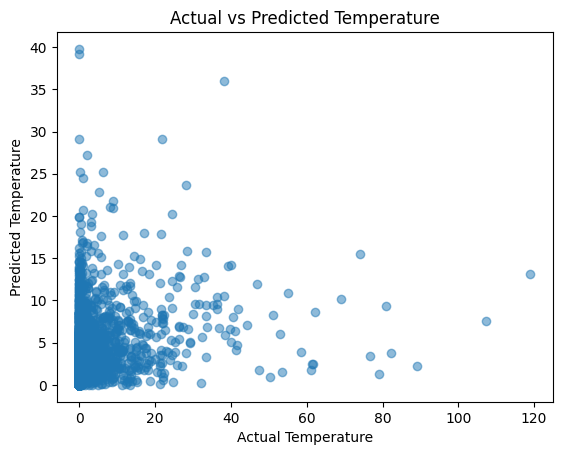

In [20]:
y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature")
plt.show()

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


In [23]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 2.952005838756763
Mean Squared Error: 48.4054241145466
Root Mean Squared Error: 6.957400672273129
R-squared: 0.09934252603130067
